<a href="https://colab.research.google.com/github/alanabates/EDA-and-Predictive-Analytics-in-Python/blob/main/Q1_Bates_Alana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


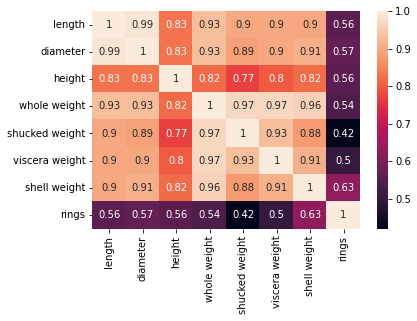

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Assume that we want to estimate weight of a sample through linear regression, based on the correlation matrix suggest two predictors.

**Answer:** Based on the correlation matrix, two predictors of the weight of a sample are length and diameter. Both length and diameter are good predictors of the weight of a sample as there is a high correlation between both the length and diameter variables and each of the weight variables: whole weight, shucked weight, viscera weight, and shell weight. However, if we are simply trying to estimate the whole weight of a sample and not the shucked, viscera, and shell weight, then the best predictors of the whole weight of a sample are the shucked weight and viscera weight. Both the shucked and viscera weight variables have a high correlation with whole weight with a correlation of 0.97.

Assume that we want to estimate diameter of a sample through linear regression, based on the correlation matrix suggest two predictors.

**Answer:** If we want to estimate the diameter of a sample through linear regression, length and whole weight are the best predictors. Length has the highest correlation with diameter with a correlation of 0.99 and whole weight has the second highest correlation with diameter with a correlation of 0.93.

In [ ]:
X = df[['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings']] # the predictors


y = df['sex'] # the target

In [ ]:
#the test set will be 30% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Explain the purpose of spliting data into training and test sets?  Explain various considerations when performing this action? 

**Answer:** The purpose of splitting data into training and test sets is to ensure the model's predictions are accurate as splitting the data allows you to assess your model's performance after it has been trained. The training set is necessary to teach the model to make predictions as the model learns how to make predictions based on the data in the training set. The test set is needed to determine the predictive accuracy of the model. Without a test set, the model's predictive performance cannot be assessed and we would be unable to assess how well the model will generalize to an unknown dataset. When splitting data into training and test sets, an important consideration is what split percentage to use. The training set cannot be too small or the model will not have enough data to learn from and there needs to be enough data included in the test set to estimate the model's predictive performance. The data split percentage you chose may depend on a variety of factors such as how large the dataset is and what the model is intended to be used for. Additionally, it is important that the data split is randomized to eliminate potential bias.

Explain how the logistic regression algorithm works?

**Answer:** The logistic regression algorithm is a classification algorithm used to predict the probability of an event or certain outcome occurring. Logistic regressions take in non-linear data and provides a binary and mutually exclusive output for binary classification problems. For non-binary classification problems, multinomial logistic regressions can be used where the output values is one of three or more classes. The logistic regression algorithm uses a link function called "logit" since there is no linear relationship between the variables. The logit function helps to fit the data and it makes up for the lack of  a linear relationship. Furthermore, the logistic regression algorithm predicts outputs as negative (i.e. "No") if they are close to 0 and positive (i.e. "Yes") if they are close to 1. 


In [ ]:
#Building the Logistic regression object
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
#using logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generating predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generating predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)

In [ ]:
#Building a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy= 'most_frequent')
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [ ]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Logistic Regression) = 0.5685805422647527

Test accuracy (Dummy Classifier) = 0.3652312599681021


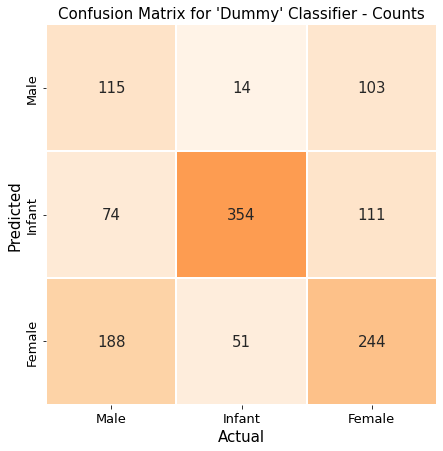

In [ ]:
#generating confusion matrix for classifier
cm_dummy = confusion_matrix(y_test, logis_pred)
#putting it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Using a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Male","Infant", 'Female'], yticklabels=["Male","Infant", 'Female'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Male","Infant", 'Female'], fontsize=13)
ax.set_yticklabels(["Male","Infant", 'Female'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

Assume that we are interested in predicting Infants, what is the value of the following parameters (use the Confusion Matrix for Logstic Regression Classifier):

True Postive: For predicting infants, the true positive value is 354.

True Negative: For predicting infants, the true negative value is 650 (115 + 103 + 188 + 244).

Recall: The recall value if we are predicting infants is 0.84 (354/(354+65)).

Why do we make a distinction between type 1 and type 2 errors? Use an example to convey your point.

**Answer:** Type 1 errors are false positives which means that the actual outcome value is negative but the model predicted the outcome to be positive. For example, if a patient received a positive diagnosis from a cancer screening when they in reality do not have cancer, that would be a Type 1 error. Type 2 errors are false negatives. With a Type 2 error, the model inaccurately predicts a negative outcome when the actual outcome is positive. An example of this would be if a patient received a negative diagnosis from their cancer screening when they actually do have cancer. 

What is the difference between clustering and classification?

**Answer:** The main difference between clustering and classification is that clustering is a unsupervised machine learning problem whereas classification is a supervised machine learning problem. Since classification is a supervised machine learning problem, the model is trained using both input and output values. This means that the training data is labelled with classification. On the other hand, since clustering is a type of unsupervised machine learning, the model is only fed the input values. Another important difference between clustering and classification is what they are intended to be used for. Clustering is used to identify similarities between objects and group them together based on their similarities into clusters. An example of when clustering would be useful is for a company to create customer segments based on similar customer traits.Classification is used to classify data into two or more categories such as predicting if a customer will purchase a product as either a "Yes" or "No".  

What is a dummy classifier? Why would you prepare one?

**Answer:** A dummy classifier is a model that makes predictions without trying to find patterns in the data, as if it were guessing. Preparing a dummy classifier helps you understand your model's performance by giving you a measure of baseline performance. This is helpful when improving on your model's performance as you can compare how your model is performing aganist the baseline set by the dummy classifier using performance metrics such as accuracy.